In [1]:
# Step 1: Import Libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Step 2: Load Dataset
df = pd.read_csv('./dataset/Bangalore_AQI_Dataset.csv')
print("Data Loaded Successfully\n")
print(df.head())

Data Loaded Successfully

        City      Date  AQI  PM2.5   PM10    NO2    SO2    CO    O3
0  Bangalore  01/01/18   68   37.4  73.44  56.44  77.52  0.71  64.6
1  Bangalore  02/01/18   76   41.8  82.08  63.08  86.64  0.80  72.2
2  Bangalore  03/01/18   70   38.5  75.60  58.10  79.80  0.74  66.5
3  Bangalore  04/01/18   78   42.9  84.24  64.74  88.92  0.82  74.1
4  Bangalore  05/01/18   82   45.1  88.56  68.06  93.48  0.86  77.9


In [5]:
# Step 3: Create AQI Category (Target Class)
bins = [0, 50, 100, 150, 200, 300, 500]
labels = ['Good', 'Satisfactory', 'Moderate', 'Poor', 'Very Poor', 'Severe']
df['AQI_Bucket'] = pd.cut(df['AQI'], bins=bins, labels=labels)

In [7]:
# Step 4: Select Features and Target
X = df[['PM2.5', 'PM10', 'NO2', 'SO2', 'CO', 'O3']]
y = df['AQI_Bucket']



In [9]:
# Remove missing values
df.dropna(inplace=True)


In [11]:
# Step 5: Split Data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [13]:

# Step 6: Train Random Forest Classifier
rf_model = RandomForestClassifier(
    n_estimators=100,      # number of trees
    max_depth=None,        # you can limit tree depth to prevent overfitting
    random_state=42
)
rf_model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [15]:
# Step 7: Make Predictions
y_pred = rf_model.predict(X_test)

In [17]:
# Step 8: Evaluate Model
print("\nModel Evaluation:")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))


Model Evaluation:
Accuracy: 1.0

Classification Report:
               precision    recall  f1-score   support

        Good       1.00      1.00      1.00        89
    Moderate       1.00      1.00      1.00        71
        Poor       1.00      1.00      1.00         4
Satisfactory       1.00      1.00      1.00       348

    accuracy                           1.00       512
   macro avg       1.00      1.00      1.00       512
weighted avg       1.00      1.00      1.00       512


Confusion Matrix:
 [[ 89   0   0   0]
 [  0  71   0   0]
 [  0   0   4   0]
 [  0   0   0 348]]


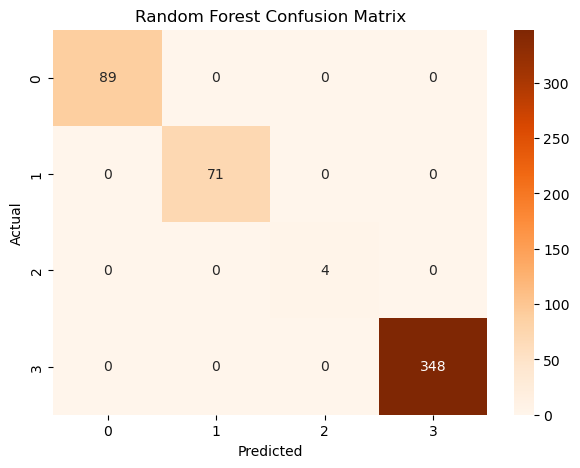

In [19]:
# Step 9: Visualize Confusion Matrix
plt.figure(figsize=(7,5))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Oranges')
plt.title('Random Forest Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

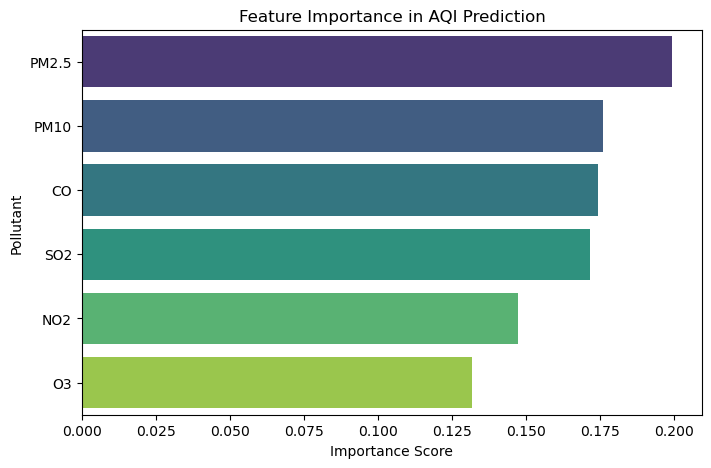

In [25]:
# Step 10: Feature Importance Visualization
feature_importance = pd.Series(rf_model.feature_importances_, index=X.columns)
feature_importance = feature_importance.sort_values(ascending=False)

plt.figure(figsize=(8,5))
sns.barplot(
    x=feature_importance.values,
    y=feature_importance.index,
    hue=feature_importance.index,  
    palette='viridis',
    dodge=False,
    legend=False                  
)

plt.title('Feature Importance in AQI Prediction')
plt.xlabel('Importance Score')
plt.ylabel('Pollutant')
plt.show()